## Questão 4

### Preparação dos dados

In [1]:
import numpy as np
from random import uniform
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
def time_series(n):
    return np.sin(n+np.sin(n)**2)

In [3]:
samples = []
labels = []

input_range=10
delta=0.3
# para n amostras de valores entre n-8 até n
# variando 0.3 entre cada valor
for n in range(0,40):
    inputArray=[]
    outputArray=[]
    for x in np.arange(n-input_range,n,delta):
        inputArray.append(time_series(x))
    samples.append(inputArray)
    for y in np.arange(n,n+3,delta):
        outputArray.append(time_series(y))
    labels.append(outputArray)

In [4]:
samples = np.array(samples)
labels = np.array(labels)

In [5]:
train_samples, test_samples, train_labels, test_labels = train_test_split(samples, labels, test_size=0.2, random_state=33)
print(train_samples.shape)
print(train_labels.shape)

(32, 34)
(32, 10)


## Modelo

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [7]:
model = Sequential([
    Dense(units=5, input_shape=(34,), activation='relu'),   
    Dense(units=10, activation='linear'),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 175       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [10]:
result = model.fit(x=train_samples, y=train_labels, validation_split=0.2, batch_size=50, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.5024 - mean_absolute_error: 0.5867 - val_loss: 0.3311 - val_mean_absolute_error: 0.4723
Epoch 2/100
1/1 - 0s - loss: 0.3279 - mean_absolute_error: 0.4728 - val_loss: 0.3198 - val_mean_absolute_error: 0.4447
Epoch 3/100
1/1 - 0s - loss: 0.2990 - mean_absolute_error: 0.4395 - val_loss: 0.2423 - val_mean_absolute_error: 0.3913
Epoch 4/100
1/1 - 0s - loss: 0.2114 - mean_absolute_error: 0.3610 - val_loss: 0.1632 - val_mean_absolute_error: 0.3240
Epoch 5/100
1/1 - 0s - loss: 0.1374 - mean_absolute_error: 0.2817 - val_loss: 0.1541 - val_mean_absolute_error: 0.3340
Epoch 6/100
1/1 - 0s - loss: 0.1379 - mean_absolute_error: 0.2938 - val_loss: 0.1527 - val_mean_absolute_error: 0.3170
Epoch 7/100
1/1 - 0s - loss: 0.1442 - mean_absolute_error: 0.2898 - val_loss: 0.1392 - val_mean_absolute_error: 0.3016
Epoch 8/100
1/1 - 0s - loss: 0.1264 - mean_absolute_error: 0.2698 - val_loss: 0.1244 - val_mean_absolute_error: 0.2940
Epoch 9/100
1/1 - 0s - loss: 0.1028 - mean_absol

Epoch 70/100
1/1 - 0s - loss: 0.0102 - mean_absolute_error: 0.0794 - val_loss: 0.0368 - val_mean_absolute_error: 0.1440
Epoch 71/100
1/1 - 0s - loss: 0.0100 - mean_absolute_error: 0.0792 - val_loss: 0.0365 - val_mean_absolute_error: 0.1435
Epoch 72/100
1/1 - 0s - loss: 0.0098 - mean_absolute_error: 0.0783 - val_loss: 0.0363 - val_mean_absolute_error: 0.1427
Epoch 73/100
1/1 - 0s - loss: 0.0097 - mean_absolute_error: 0.0772 - val_loss: 0.0365 - val_mean_absolute_error: 0.1423
Epoch 74/100
1/1 - 0s - loss: 0.0096 - mean_absolute_error: 0.0765 - val_loss: 0.0375 - val_mean_absolute_error: 0.1433
Epoch 75/100
1/1 - 0s - loss: 0.0094 - mean_absolute_error: 0.0758 - val_loss: 0.0384 - val_mean_absolute_error: 0.1447
Epoch 76/100
1/1 - 0s - loss: 0.0093 - mean_absolute_error: 0.0750 - val_loss: 0.0386 - val_mean_absolute_error: 0.1444
Epoch 77/100
1/1 - 0s - loss: 0.0092 - mean_absolute_error: 0.0742 - val_loss: 0.0386 - val_mean_absolute_error: 0.1437
Epoch 78/100
1/1 - 0s - loss: 0.0091 - m

### Gráfico do erro ao longo das épocas

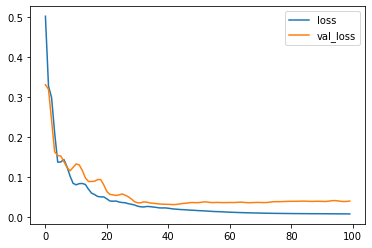

In [11]:
from matplotlib import pyplot as plt

plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

### Teste

In [12]:
predictions = model.predict(x=test_samples, batch_size=50, verbose=0)

In [15]:
print(predictions.shape)
print(test_labels.shape)

(8, 10)
(8, 10)


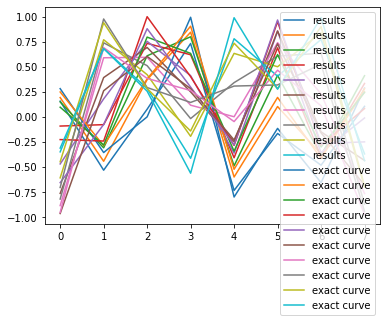

In [13]:
plt.plot(predictions[:100], label='results')
plt.plot(test_labels[:100], label='exact curve')
plt.legend()